<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/Column_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Based on: https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/


# Ejemplo de ColumnTransformer para el Abalone (oreja de mar)

# liberías

from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

# Carga del dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/abalone.csv'
dataframe = read_csv(url, header=None)
dataframe.head()


,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7



   Objetivo: Predecir la edad del abulón a partir de medidas físicas. La edad de
   El abulón se determina cortando la concha a través del cono, teñiéndola,
   y contar el número de anillos a través de un microscopio, una tarea dispendiosa que requiere mucho tiempo. Otras medidas, que son más fáciles de obtener se pueden usar para predecir la edad.

   De los datos originales se eliminaron ejemplos con valores faltantes, y los rangos de los valores continuos se han escalado.

	Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn and
	Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_
	species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North
	Coast and Islands of Bass Strait", Sea Fisheries Division, Technical
	Report No. 48 (ISSN 1034-3288)


	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years



In [11]:
# Dividir Dataset

last_ix = len(dataframe.columns) - 1

X, y = dataframe.drop(last_ix, axis=1), dataframe[last_ix]

print(X.shape, y.shape)

(4177, 8) (4177,)


In [12]:
# Seleccionar features categoricas y numericas

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns

categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

In [13]:
# Preparación de los datos

t = [('cat', OneHotEncoder(), categorical_ix),
     ('num', MinMaxScaler(), numerical_ix)]

col_transform = ColumnTransformer(transformers=t)


In [14]:
# Definir el modelo Support Vector Regression.

model = SVR(kernel='rbf',gamma='scale',C=100)

# Definir la preparación de los datos y la creación del moldeo en un pipeline

pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

# Definir la validación cruzada

cv = KFold(n_splits=10, shuffle=True, random_state=1)


# Evaluar el pipeline usando validación cruzada y Calcular MAE

scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)


# Convertir MAE a valores positivos

scores = absolute(scores)


# Resumir y mostrar el performance del modelo

print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

MAE: 1.465 (0.047)


Error absoluto medio (MAE): MAE mide la magnitud promedio de los errores en un conjunto de predicciones, sin considerar su dirección. Es el promedio de la muestra de prueba de las diferencias absolutas entre la predicción y la observación real, donde todas las diferencias individuales tienen el mismo peso.

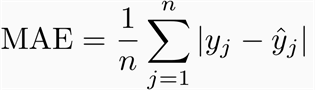